In [62]:
import nltk
import unidecode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import tokenize
from nltk import ngrams
from string import punctuation
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#nltk.download("all")

# Parte 1

## Leitura e análise primária dos dados

In [2]:
dados = pd.read_csv("imdb-reviews-pt-br.csv")

dados

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


#### Os dados estão bem estratificados

In [3]:
dados["sentiment"].value_counts(normalize=True)

neg    0.500718
pos    0.499282
Name: sentiment, dtype: float64

### Estrutura das resenhas

#### Resenha Negativa

In [4]:
n_resenha = 189
print(f"Avaliação: {dados.sentiment[n_resenha]}\n")
print(dados.text_pt[n_resenha])

Avaliação: neg

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


#### Resenha Positiva

In [5]:
n_resenha = 49002
print(f"Avaliação: {dados.sentiment[n_resenha]}\n")
print(dados.text_pt[n_resenha])

Avaliação: pos

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo

### Criando classificação para deixar padronizado

In [6]:
dados["classificacao"] = dados.sentiment.replace(["neg", "pos"], [0, 1])

dados

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


## Exemplicação do funcionamento do Bag of Words

In [7]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer()

# Matriz com os dados
bag_of_words = vetorizar.fit_transform(texto)

# Nome das colunas
colunas = vetorizar.get_feature_names()

# Uma matriz sparse como saída
display(bag_of_words)
display(colunas)

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

['assisti', 'filme', 'ruim', 'um', 'ótimo']

#### Construção da Matriz sparse com as palavras

In [8]:
# Ajuste para encaixar com a estrutura de dados de uma matriz sparse
matriz_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words)

# Renomeando as colunas para ficar melhor de entender
matriz_sparse.columns = colunas

matriz_sparse

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


### Testando para nossa base de dados

In [77]:
vetorizar = CountVectorizer(max_features=50)

bag_of_words = vetorizar.fit_transform(dados.text_pt)

In [78]:
# display(bag_of_words.shape)
# display(vetorizar.get_feature_names())

In [79]:
treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words, dados.sentiment, random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino_x, treino_y)
accuracy = regressao_logistica.score(teste_x, teste_y) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 66.89%


#### Função para testar a accuracy da nossa predição

In [12]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino_x, treino_y)
    accuracy = regressao_logistica.score(teste_x, teste_y) * 100

    print(f"Accuracy: {accuracy:.2f}%")

In [13]:
classificar_texto(dados, "text_pt", "sentiment")

Accuracy: 66.89%


## WordCloud - Visualizando os dados

In [14]:
%matplotlib inline

# Colocando todas as palavras dos textos em 1 única variável
todas_palavras = " ".join([texto for texto in dados["text_pt"]])

# Gerando a nuvem de palavras
# Retorna um objeto
nuvem_palavras = WordCloud().generate(todas_palavras)

display(len(todas_palavras))

63448424

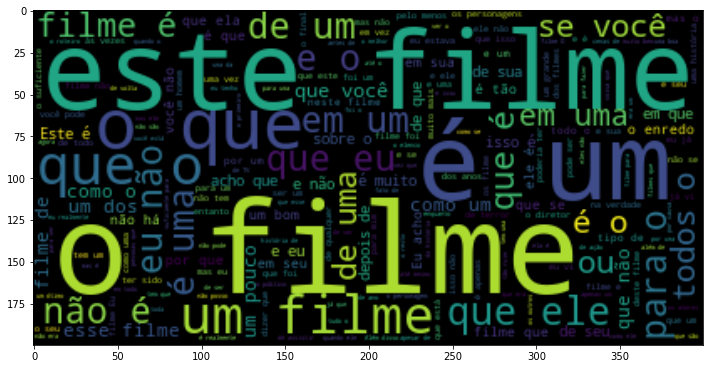

In [15]:
# Maneira de exibir o objeto retornado pela WordCloud em forma de imagem
plt.figure(figsize=(12,8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

### Otimizando a visualização do WordCloud

In [16]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

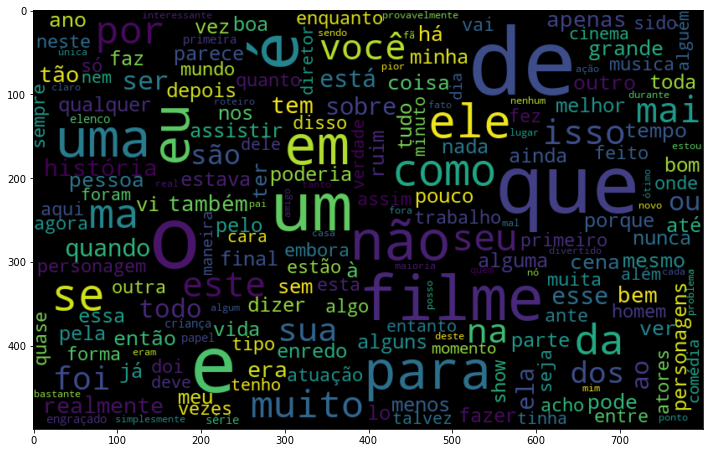

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

Considerações:
  - Conectores da linguagem aparecem muito (sujeira)
  - É interessante gerar uma visualização para cada tipo de sentimento

## Tokenização usando NLTK

#### Exemplificação de como funciona o NLTK

In [18]:
frase = ["um filme ruim", "um filme bom"]

frequencia = nltk.FreqDist(frase)

frequencia
# Ele contou a frequencia de frases dentro do meu array

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

#### Tokenizaçãod de uma frase por espaços

In [19]:
frase = "Bem vindo ao mundo do PLN!"

# Instanciamento do tokenizer por espaços
token_espaco = tokenize.WhitespaceTokenizer()

# Transformação da nossa frase normal em um separada por espaços
token_frase = token_espaco.tokenize(frase)

token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

### Aplicando no Dataset

In [20]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

frequencia = nltk.FreqDist(token_frase)

frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

#### Criando Dataframe com as palavras e suas frequências

In [21]:
df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()), 
                              "Frequencia" : list(frequencia.values())})

df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


#### Palavras mais recorrentes

In [22]:
# Seleciona as palavras mais frequentes
palavras_mais_recorrentes = df_frequencia.nlargest(columns="Frequencia", n=10)

palavras_mais_recorrentes

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


#### Exibição das palavras mais recorrentes em um gráfico

<AxesSubplot:xlabel='Palavra', ylabel='Frequencia'>

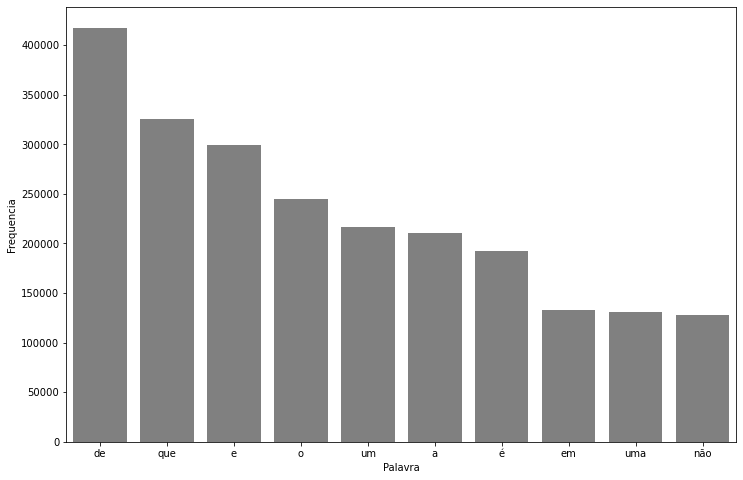

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data=palavras_mais_recorrentes, x="Palavra", y="Frequencia", color='gray')

### Função para analisar o gráfico com as palavras mais recorrentes

In [24]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = " ".join([texto for texto in texto[coluna_texto]])

    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)

    frequencia = nltk.FreqDist(token_frase)
    
    df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()), 
                                  "Frequencia" : list(frequencia.values())})

    palavras_mais_recorrentes = df_frequencia.nlargest(columns="Frequencia", n=quantidade)

    plt.figure(figsize=(12,8))
    sns.barplot(data=palavras_mais_recorrentes, x="Palavra", y="Frequencia", color='gray')

### Função para analisar o WordCloud com as palavras mais recorrentes

In [25]:
def nuvem_pos(df, coluna):
    df_pos = df.query("classificacao == 1")
    
    todas_palavras = " ".join([texto for texto in df_pos[coluna]])

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(12,8))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.show()
    
def nuvem_neg(df, coluna):
    df_neg = df.query("classificacao == 0")
    
    todas_palavras = " ".join([texto for texto in df_neg[coluna]])

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

    plt.figure(figsize=(12,8))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.show()

## Primeiro tratamento das nossas palavras

#### Definição das palavras irrelevantes

In [26]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

palavras_irrelevantes

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [27]:
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()

for opiniao in dados.text_pt:
    nova_frase = list()
    
    palavra_texto = token_espaco.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
            
    frase_processada.append(" ".join(nova_frase))
    
dados["tratamento"] = frase_processada

dados    

,id,text_en,text_pt,sentiment,classificacao,tratamento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."
...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...


In [28]:
classificar_texto(dados, "tratamento", "classificacao")

Accuracy: 66.41%


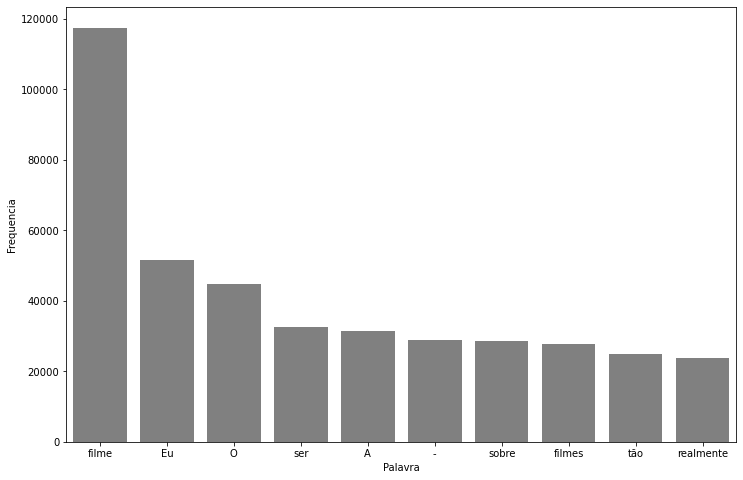

In [29]:
pareto(dados, "tratamento", 10)

# Parte 2

Exemplo de pontuação na frase:
  - perfeito, o filme.
  - o filme é perfeito.
  
  Elas teriam o mesmo resultado dentro da vetorização, pois retirando as StopWords e a pontuação, o vetor ficaria com a contagem:
  - perfeito : 1
  - filme : 1
  
  Em ambos os casos

#### Exemplo de Tokenização da pontuação

In [30]:
frase_teste = "Olá, bem-vindo ao mundo!"

token_pontuacao = tokenize.WordPunctTokenizer()
frase_token = token_pontuacao.tokenize(frase_teste)

frase_token

['Olá', ',', 'bem', '-', 'vindo', 'ao', 'mundo', '!']

#### Retirando as pontuações do Dataset

In [31]:
display(punctuation)
pontuacao = list()

# Colocando as pontuações em uma lista separada
for ponto in punctuation:
    pontuacao.append(ponto)
    
# União das pontuações e das palavras irrelevantes para remoção no Dataset
pontuacao_stopwords = pontuacao + palavras_irrelevantes

# Novo processamento dos dados
frase_processada_pontuacao = list()

for opiniao in dados.tratamento:
    nova_frase = list()
    
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
            
    frase_processada_pontuacao.append(" ".join(nova_frase))
    
dados["tratamento_pontuacao"] = frase_processada_pontuacao

dados

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

,id,text_en,text_pt,sentiment,classificacao,tratamento,tratamento_pontuacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


### Comparação entre o primeiro tratamento e segundo tratamento

In [32]:
display(dados["tratamento"][0])
display(dados["tratamento_pontuacao"][0])

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

#### Análise com a remoção da pontuação do Dataset

In [33]:
classificar_texto(dados, "tratamento_pontuacao", "classificacao")

Accuracy: 66.11%


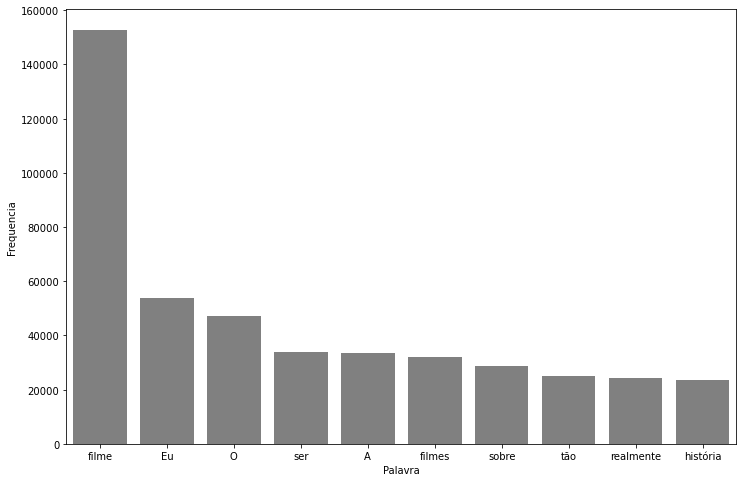

In [34]:
pareto(dados, "tratamento_pontuacao", 10)

### Remoção de acentos do Dataset

#### Exemplificação do uso da lib unidecode

In [35]:
acentos = "ótimo péssimo é legal"

teste = unidecode.unidecode(acentos)

teste

'otimo pessimo e legal'

#### Removendo dos acentos por uma iteração sobre os dados

In [36]:
sem_acentos = [unidecode.unidecode(texto) for texto in dados.tratamento_pontuacao]

dados["tratamento_acento"] = sem_acentos

dados

,id,text_en,text_pt,sentiment,classificacao,tratamento,tratamento_pontuacao,tratamento_acento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...
...,...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...,Como media votos baixa fato funcionario locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros med...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


#### Tratamento específico para retirar eventuais Stopwords escritas sem os acentos

In [37]:
pontuacao_stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

pontuacao_stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [38]:
frase_processada_stopwords_sem_acento = list()

for opiniao in dados.tratamento_acento:
    nova_frase = list()
    
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords_sem_acento:
            nova_frase.append(palavra)
            
    frase_processada_stopwords_sem_acento.append(" ".join(nova_frase))
    
dados["tratamento_stopword_acento"] = frase_processada_stopwords_sem_acento

dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento,tratamento_pontuacao,tratamento_acento,tratamento_stopword_acento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [39]:
classificar_texto(dados, "tratamento_stopword_acento", "classificacao")

Accuracy: 66.10%


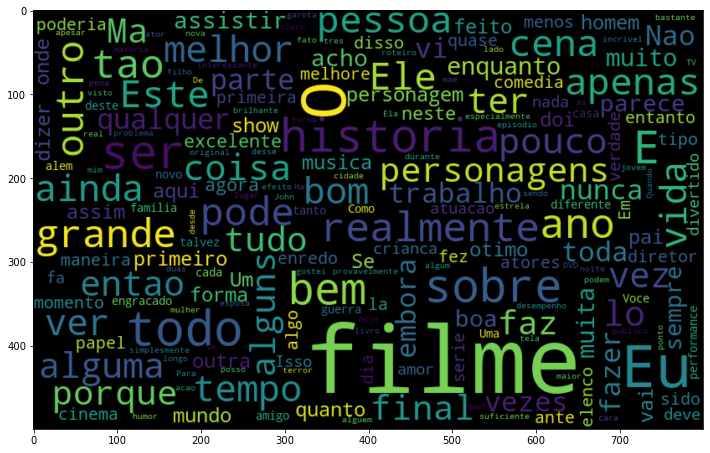

In [40]:
nuvem_pos(dados, "tratamento_stopword_acento")

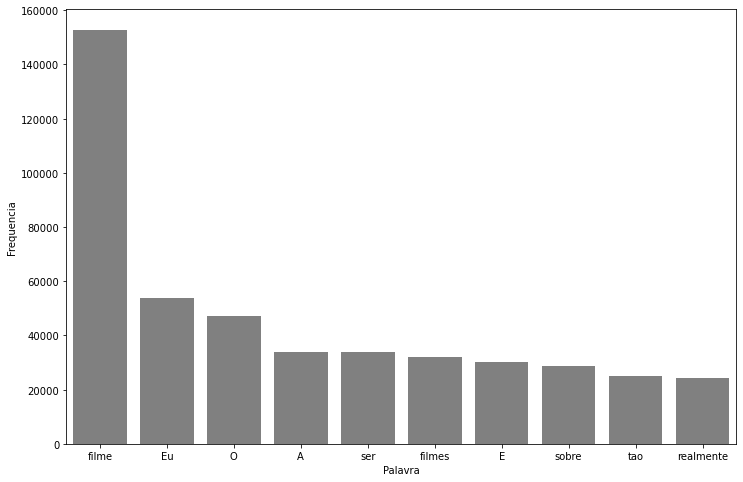

In [41]:
pareto(dados, "tratamento_stopword_acento", 10)

### Tratamento letras maiúsculas

#### Exemplificação do tratamento de letras maiúsculas

In [42]:
frase = "O Davi não sabe fazer NPL"

frase.lower()

'o davi não sabe fazer npl'

#### Alterando o Dataset para deixar tudo minúsculo

In [43]:
frase_processada_min = list()

for opiniao in dados.tratamento_stopword_acento:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in pontuacao_stopwords_sem_acento:
            nova_frase.append(palavra)
            
    frase_processada_min.append(" ".join(nova_frase))
    
dados["tratamento_min"] = frase_processada_min

dados.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento,tratamento_pontuacao,tratamento_acento,tratamento_stopword_acento,tratamento_min
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


### Comparação entre o texto inicial e o texto após diversos processamentos

In [44]:
display(dados["text_pt"][0])
display(dados["tratamento_min"][0])

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [45]:
classificar_texto(dados, "tratamento_min", "classificacao")

Accuracy: 68.79%


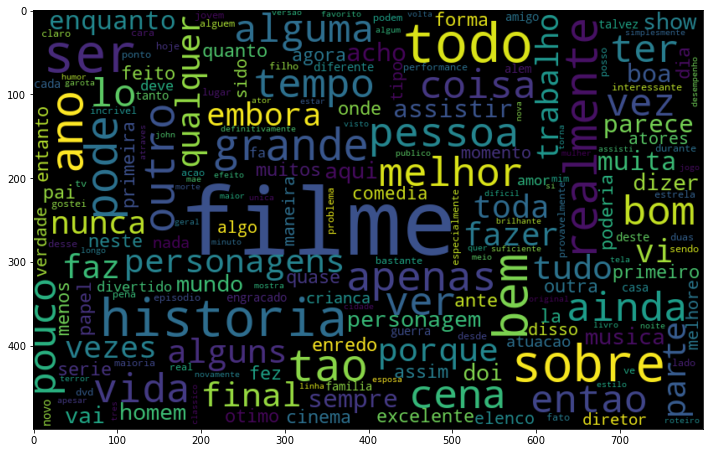

In [46]:
nuvem_pos(dados, "tratamento_min")

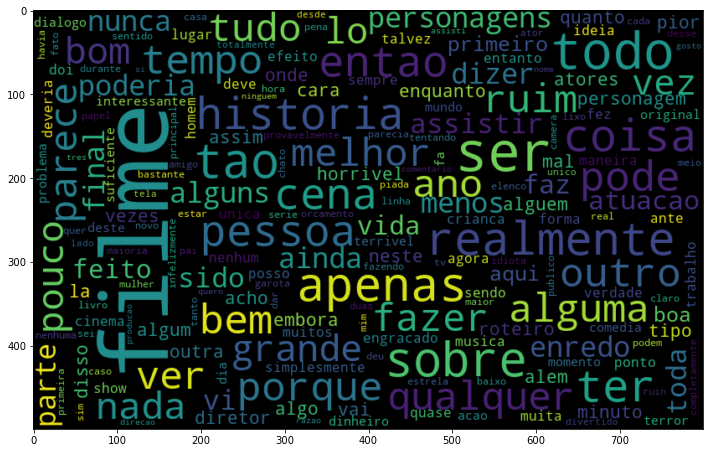

In [47]:
nuvem_neg(dados, "tratamento_min")

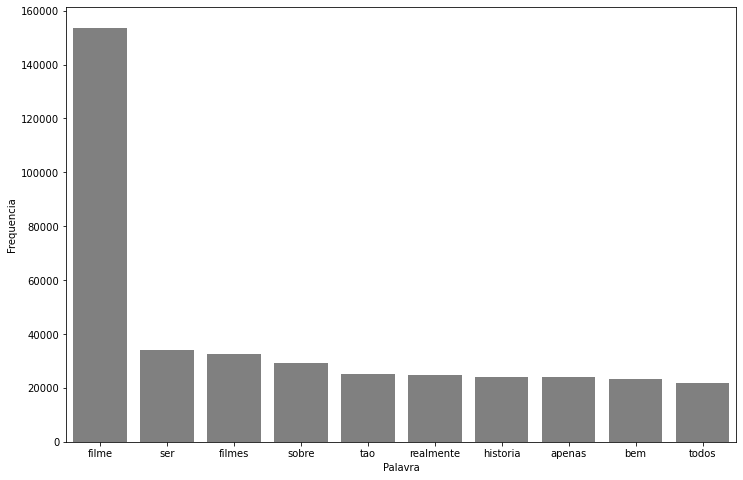

In [48]:
pareto(dados, "tratamento_min", 10)

## Remoção dos radicais das palavras

#### Exemplificação do funcionamento do Stemmer

In [50]:
stemmer = nltk.RSLPStemmer()

palavra1 = "corredor"
palavra2 = "correria"
palavra3 = "corrida"

display(stemmer.stem(palavra1))
display(stemmer.stem(palavra2))
display(stemmer.stem(palavra3))

'corr'

'corr'

'corr'

### Aplicando o Stemmer no Dataset

In [51]:
frase_processada_stemmer = list()

for opiniao in dados.tratamento_min:
    nova_frase = list()
    #opiniao = opiniao.lower()
    palavra_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavra_texto:
        # Aplicação do stemmer na palavra
        nova_frase.append(stemmer.stem(palavra))
            
    frase_processada_stemmer.append(" ".join(nova_frase))
    
dados["tratamento_stemmer"] = frase_processada_stemmer

### Comparação antes e depois da remoção dos radicais

In [53]:
display(dados.head())
display(dados["text_pt"][0])
display(dados["tratamento_stemmer"][0])

,id,text_en,text_pt,sentiment,classificacao,tratamento,tratamento_pontuacao,tratamento_acento,tratamento_stopword_acento,tratamento_min,tratamento_stemmer
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

'vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual pouc simples import nenhum person maior fantasm armari person cost realiz log inici esquec tard import person deveri import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor mostr sinal armari desorden unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz deslig hor'

In [52]:
classificar_texto(dados, "tratamento_stemmer", "classificacao")

Accuracy: 69.44%


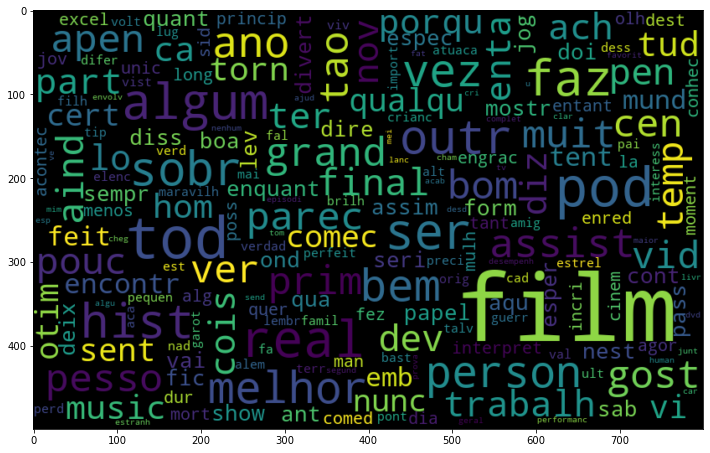

In [54]:
nuvem_pos(dados, "tratamento_stemmer")

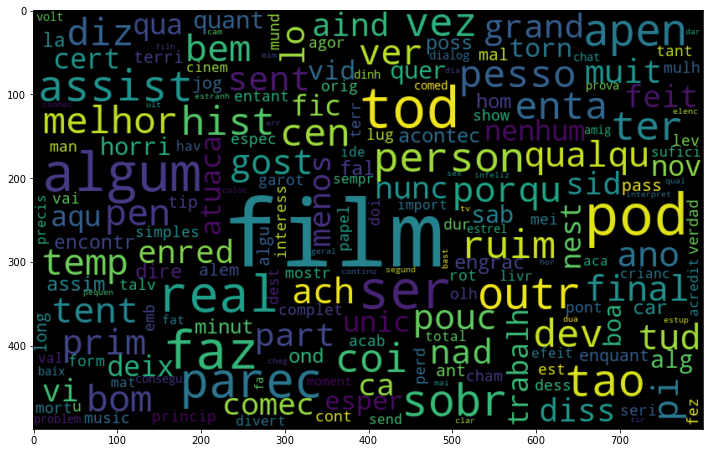

In [55]:
nuvem_neg(dados, "tratamento_stemmer")

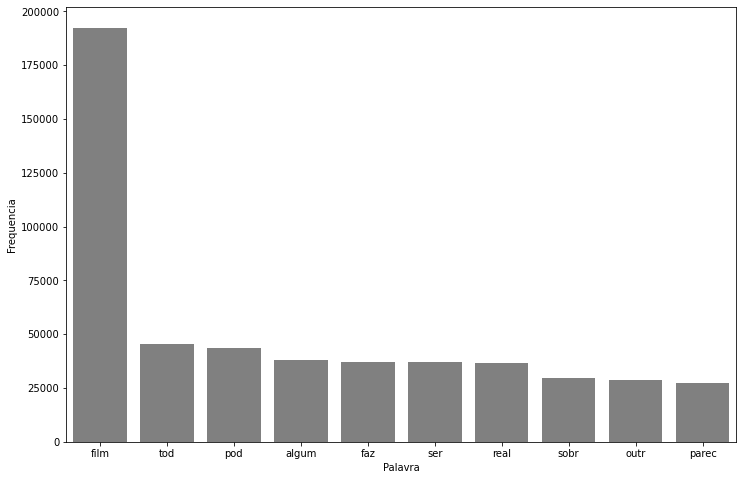

In [57]:
pareto(dados, "tratamento_stemmer", 10)

## TF-IDF: Nova técnica de vetorização

#### Exemplificação do uso do TF-IDF

In [59]:
frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfifd = TfidfVectorizer(max_features=50)

caracteristicas = tfifd.fit_transform(frases)

df_tfidf = pd.DataFrame(
    caracteristicas.todense(),
    columns=tfifd.get_feature_names(),
)

df_tfidf

,assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


### Usando o TF-IDF no Dataset

#### Para os dados Brutos, antes de qualquer tratamento

In [60]:
tfidf_bruto = tfifd.fit_transform(dados.text_pt)

treino_x, teste_x, treino_y, teste_y = train_test_split(tfidf_bruto, dados.classificacao, random_state=42)

regressao_logistica.fit(treino_x, treino_y)
accuracy = regressao_logistica.score(teste_x, teste_y) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 67.01%


#### Para os dados Tratados, o último tratamento que foi realizado

In [61]:
tfidf_tratado = tfifd.fit_transform(dados.tratamento_stemmer)

treino_x, teste_x, treino_y, teste_y = train_test_split(tfidf_tratado, dados.classificacao, random_state=42)

regressao_logistica.fit(treino_x, treino_y)
accuracy = regressao_logistica.score(teste_x, teste_y) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 69.88%


## Ngrams

#### Exemplificação do Ngrams

In [66]:
frase = "Assisti um ótimo filme."

frase_separada = token_espaco.tokenize(frase)

pares = ngrams(frase_separada, 2)

list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

#### Aplicando o Ngrams no Dataset

In [67]:
# Usando ngrams
tfidf_ngrams = TfidfVectorizer(ngram_range=(1,2))
vetor_tfidf = tfidf_ngrams.fit_transform(dados.tratamento_stemmer)

treino_x, teste_x, treino_y, teste_y = train_test_split(vetor_tfidf, dados.classificacao, random_state=42)

regressao_logistica.fit(treino_x, treino_y)
accuracy = regressao_logistica.score(teste_x, teste_y) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 88.59%


In [69]:
# Não usando ngrams
tfidf = TfidfVectorizer()
vetor_tfidf = tfidf.fit_transform(dados.tratamento_stemmer)

treino_x, teste_x, treino_y, teste_y = train_test_split(vetor_tfidf, dados.classificacao, random_state=42)

regressao_logistica.fit(treino_x, treino_y)
accuracy = regressao_logistica.score(teste_x, teste_y) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 88.42%


#### Analisando os pesos da palavras mais relevantes

In [72]:
# Criando um data frame que tem como o index as palavras mais relevantes que o modelo aprendeu

pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)

In [71]:
# Maiores pesos de opniões positivas
pesos.nlargest(10, 0)

,0
otim,8.290476
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579573
ador,4.422221
brilh,4.268573


In [73]:
# Maiores pesos de opniões negativas
pesos.nsmallest(10, 0)

,0
pi,-9.175702
ruim,-9.169724
horri,-8.751673
terri,-7.186909
chat,-6.919292
nad,-6.029855
infeliz,-5.310520
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
